In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [27]:
df = pd.read_csv("housing.csv")
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [29]:
df.dropna(inplace= True)

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
 9   ocean_proximity     20433 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.7+ MB


In [31]:
from sklearn.model_selection import train_test_split

x = df.drop(["median_house_value"], axis=1)
y = df["median_house_value"]

In [32]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2)

In [33]:
train_data = x_train.join(y_train)
train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
7920,-118.07,33.86,28.0,1789.0,352.0,1347.0,330.0,3.4250,<1H OCEAN,189700.0
174,-122.24,37.80,52.0,996.0,228.0,731.0,228.0,2.2697,NEAR BAY,127000.0
11052,-117.85,33.79,52.0,1963.0,430.0,1197.0,415.0,3.8929,<1H OCEAN,211000.0
16796,-122.43,37.66,29.0,3541.0,786.0,2259.0,770.0,4.3039,NEAR OCEAN,278400.0
15858,-122.39,37.76,52.0,157.0,28.0,88.0,27.0,3.6750,NEAR BAY,162500.0
...,...,...,...,...,...,...,...,...,...,...
12224,-116.95,33.68,11.0,1183.0,178.0,543.0,147.0,4.4792,INLAND,173900.0
13436,-117.44,34.09,24.0,3477.0,831.0,2541.0,753.0,2.3682,INLAND,97400.0
13605,-117.26,34.17,30.0,1937.0,351.0,945.0,344.0,3.8906,INLAND,123700.0
13049,-121.32,38.59,21.0,9774.0,1777.0,4674.0,1712.0,3.6817,INLAND,136100.0


array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

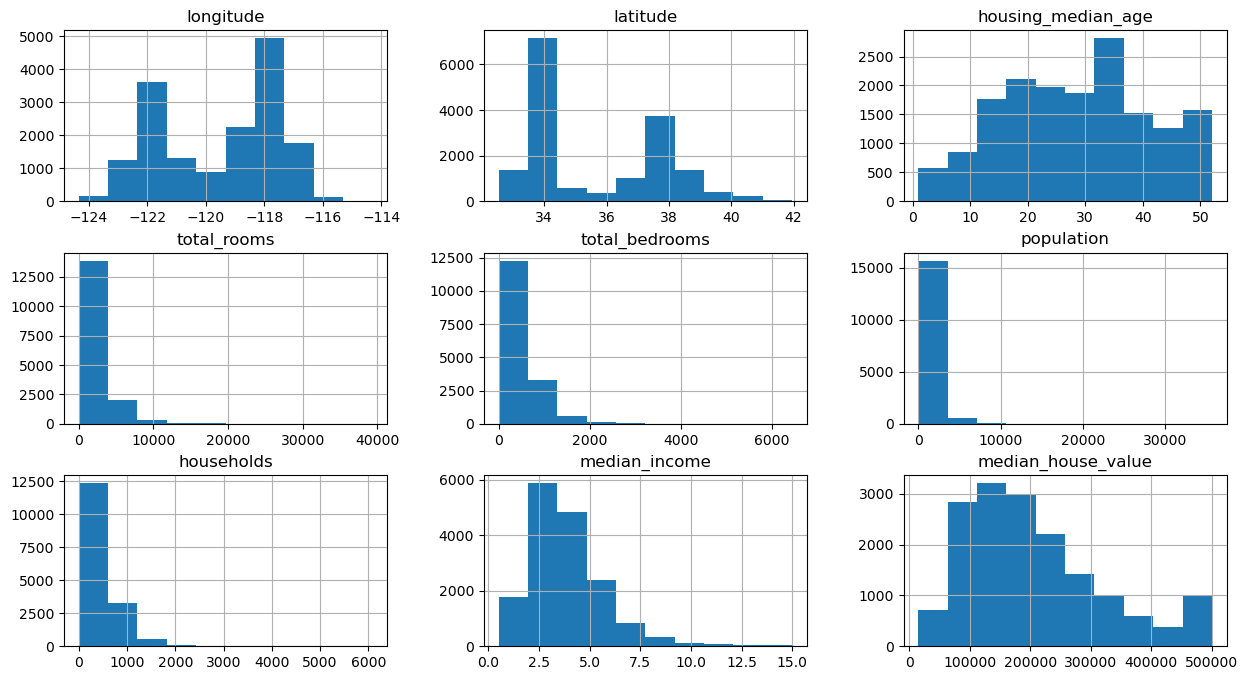

In [34]:
train_data.hist(figsize= (15,8))

<Axes: >

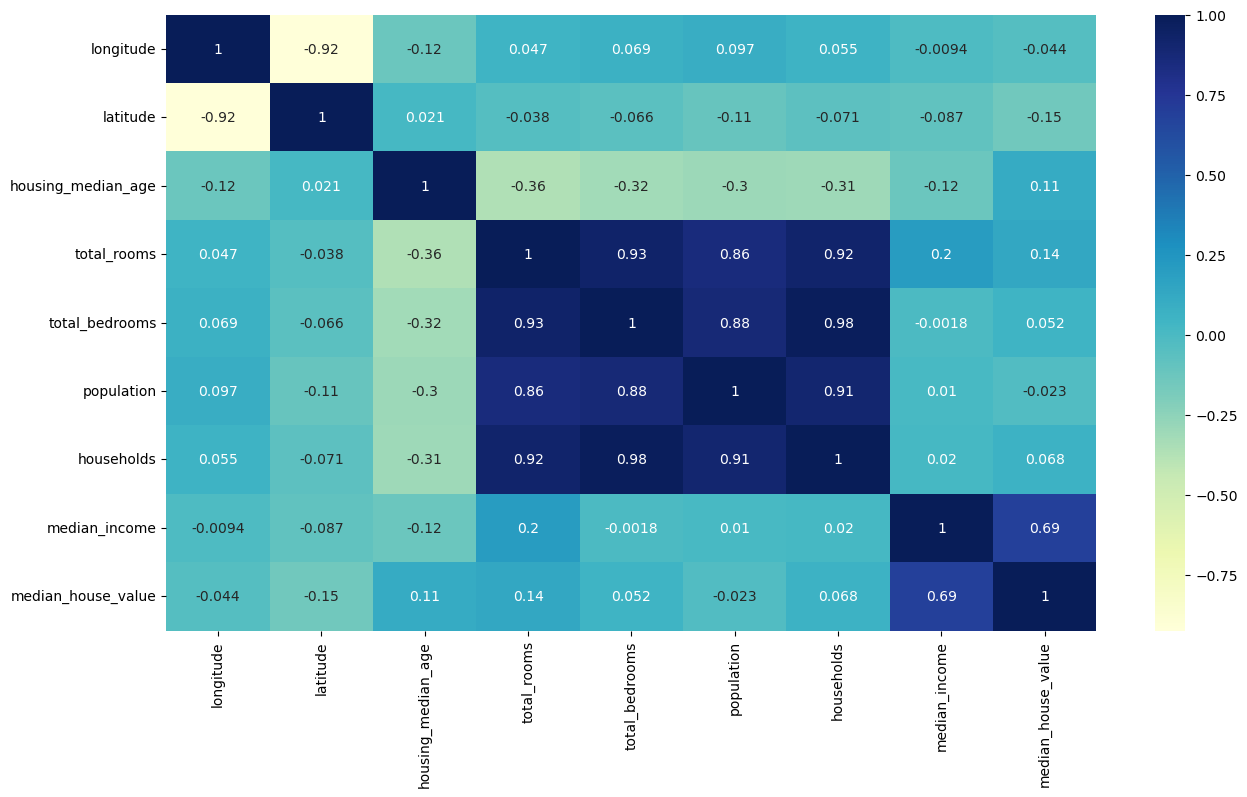

In [35]:
plt.figure(figsize=(15,8))
sns.heatmap(train_data.corr(numeric_only=True), annot=True, cmap= 'YlGnBu')

In [36]:
# Taking Logarithms For seeing the distribution looks like

train_data["total_rooms"] = np.log(train_data["total_rooms"] +1 )
train_data["total_bedrooms"] = np.log(train_data["total_bedrooms"] +1 )
train_data["population"] = np.log(train_data["population"] +1 )
train_data["households"] = np.log(train_data["households"] +1 )

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

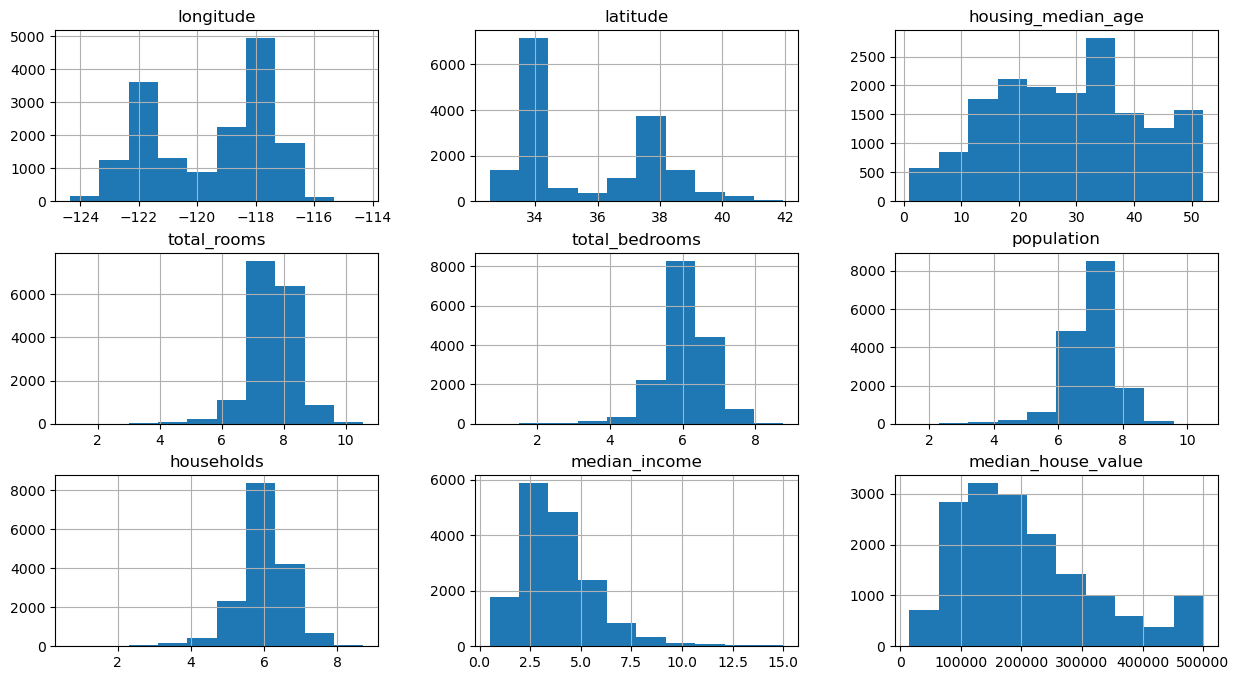

In [37]:
train_data.hist(figsize=(15,8))

In [38]:
train_data = train_data.join(pd.get_dummies(train_data.ocean_proximity)).drop(["ocean_proximity"], axis = 1)
train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
7920,-118.07,33.86,28.0,7.489971,5.866468,7.206377,5.802118,3.4250,189700.0,True,False,False,False,False
174,-122.24,37.80,52.0,6.904751,5.433722,6.595781,5.433722,2.2697,127000.0,False,False,False,True,False
11052,-117.85,33.79,52.0,7.582738,6.066108,7.088409,6.030685,3.8929,211000.0,True,False,False,False,False
16796,-122.43,37.66,29.0,8.172447,6.668228,7.723120,6.647688,4.3039,278400.0,False,False,False,False,True
15858,-122.39,37.76,52.0,5.062595,3.367296,4.488636,3.332205,3.6750,162500.0,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12224,-116.95,33.68,11.0,7.076654,5.187386,6.298949,4.997212,4.4792,173900.0,False,True,False,False,False
13436,-117.44,34.09,24.0,8.154213,6.723832,7.840706,6.625392,2.3682,97400.0,False,True,False,False,False
13605,-117.26,34.17,30.0,7.569412,5.863631,6.852243,5.843544,3.8906,123700.0,False,True,False,False,False
13049,-121.32,38.59,21.0,9.187583,7.483244,8.449984,7.446001,3.6817,136100.0,False,True,False,False,False


<Axes: >

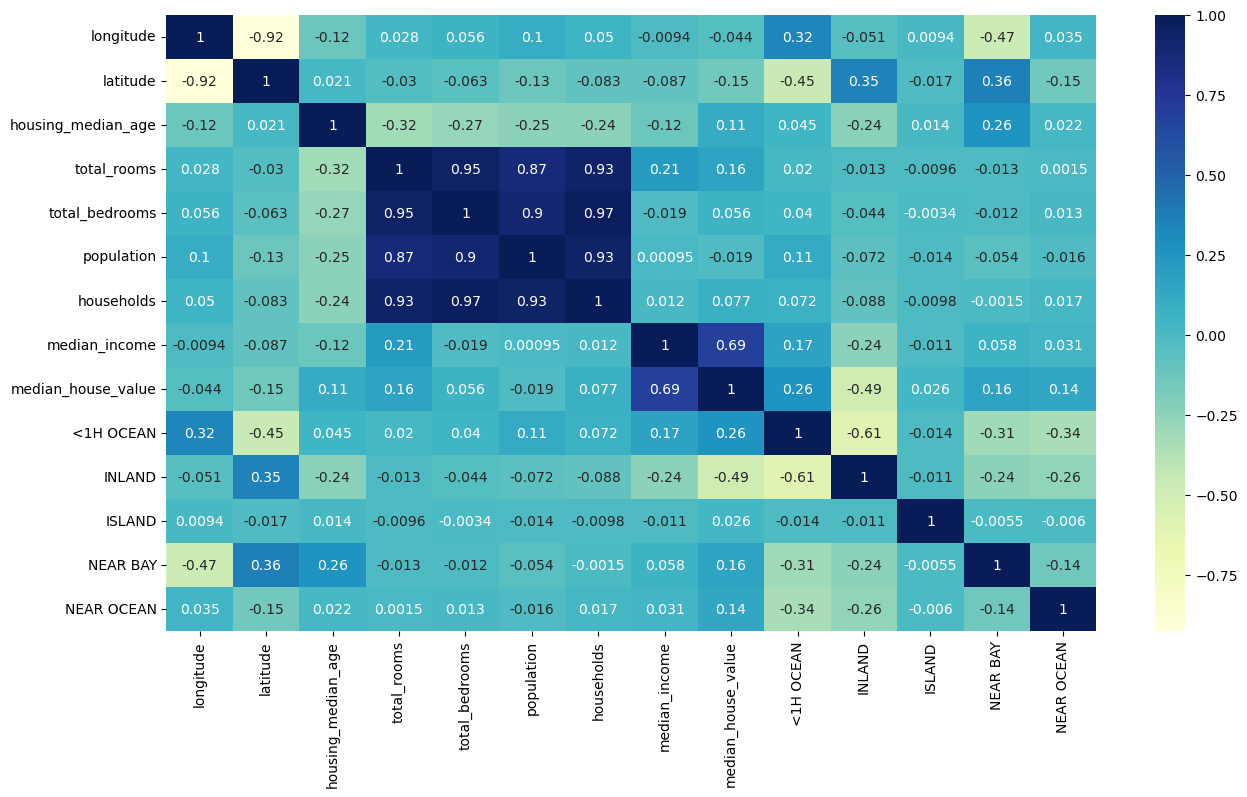

In [39]:
plt.figure(figsize=(15,8))
sns.heatmap(train_data.corr(numeric_only=True), annot=True, cmap= 'YlGnBu')

<Axes: xlabel='latitude', ylabel='longitude'>

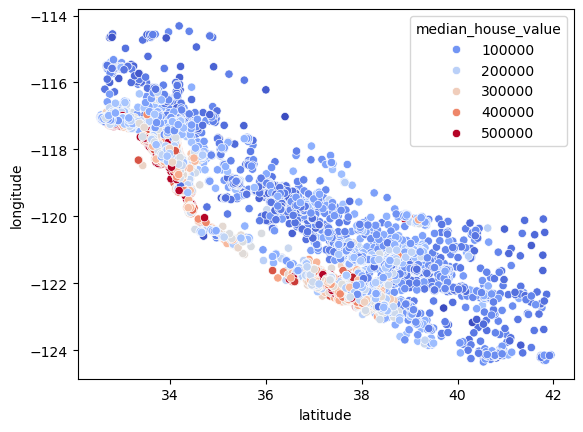

In [40]:
plt.Figure(figsize=(15,8))
sns.scatterplot(x="latitude", y= "longitude", data= train_data, hue= "median_house_value", palette= "coolwarm")

In [41]:
#Future Scaling
train_data["bedroom_ratio"] = train_data["total_rooms"]/ train_data["total_rooms"]
train_data["household_rooms"] = train_data["total_rooms"]/ train_data["households"]

In [42]:
train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN,bedroom_ratio,household_rooms
7920,-118.07,33.86,28.0,7.489971,5.866468,7.206377,5.802118,3.4250,189700.0,True,False,False,False,False,1.0,1.290903
174,-122.24,37.80,52.0,6.904751,5.433722,6.595781,5.433722,2.2697,127000.0,False,False,False,True,False,1.0,1.270722
11052,-117.85,33.79,52.0,7.582738,6.066108,7.088409,6.030685,3.8929,211000.0,True,False,False,False,False,1.0,1.257359
16796,-122.43,37.66,29.0,8.172447,6.668228,7.723120,6.647688,4.3039,278400.0,False,False,False,False,True,1.0,1.229367
15858,-122.39,37.76,52.0,5.062595,3.367296,4.488636,3.332205,3.6750,162500.0,False,False,False,True,False,1.0,1.519293
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12224,-116.95,33.68,11.0,7.076654,5.187386,6.298949,4.997212,4.4792,173900.0,False,True,False,False,False,1.0,1.416120
13436,-117.44,34.09,24.0,8.154213,6.723832,7.840706,6.625392,2.3682,97400.0,False,True,False,False,False,1.0,1.230752
13605,-117.26,34.17,30.0,7.569412,5.863631,6.852243,5.843544,3.8906,123700.0,False,True,False,False,False,1.0,1.295346
13049,-121.32,38.59,21.0,9.187583,7.483244,8.449984,7.446001,3.6817,136100.0,False,True,False,False,False,1.0,1.233895


<Axes: >

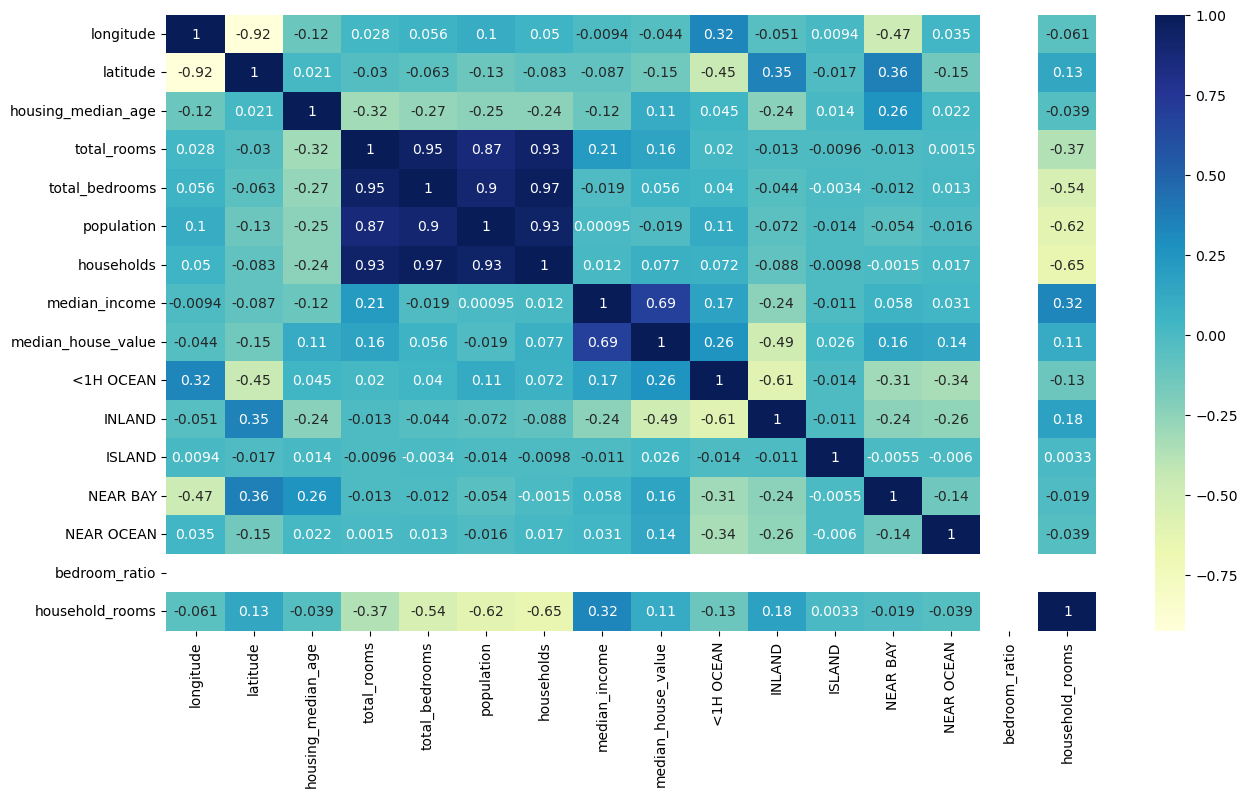

In [43]:
plt.figure(figsize=(15,8))
sns.heatmap(train_data.corr(numeric_only=True), annot=True, cmap= 'YlGnBu')

In [62]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

x_train, y_train = train_data.drop(["median_house_value"], axis= 1), train_data["median_house_value"]


reg = LinearRegression()
reg.fit(x_train,y_train)


LinearRegression()

In [63]:
test_data = x_test.join(y_test)

test_data["total_rooms"] = np.log(test_data["total_rooms"] +1 )
test_data["total_bedrooms"] = np.log(test_data["total_bedrooms"] +1 )
test_data["population"] = np.log(test_data["population"] +1 )
test_data["households"] = np.log(test_data["households"] +1 )

test_data = test_data.join(pd.get_dummies(test_data.ocean_proximity)).drop(["ocean_proximity"], axis = 1)

test_data["bedroom_ratio"] = test_data["total_rooms"]/ test_data["total_rooms"]
test_data["household_rooms"] = test_data["total_rooms"]/ test_data["households"]



AttributeError: 'DataFrame' object has no attribute 'ocean_proximity'

In [64]:
x_test, y_test = test_data.drop(["median_house_value"], axis= 1), test_data["median_house_value"]

In [65]:
# Combine first
combined = pd.concat([x_train, x_test])
combined_encoded = pd.get_dummies(combined)

# Split back
x_train = combined_encoded.iloc[:len(x_train), :]
x_test = combined_encoded.iloc[len(x_train):, :]


In [66]:
reg.score(x_test,y_test)

-0.6617733568936146

In [56]:
# RANDOM FOREST ALGO

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

forest = RandomForestRegressor()

forest.fit(x_train, y_train)

RandomForestRegressor()

In [50]:
forest.score(x_test, y_test)

0.8185254335437212

In [ ]:
from sklearn.model_selection import GridSearchCV

param_Grid = {
    "n_estimators": [3,10,30],
    "max_features" : [2,4,6,8],
    
},